In [469]:
#importing libraries
import pandas as pd
import csv
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import os
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import tqdm
import seaborn as sns
from keras.utils.vis_utils import plot_model
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import TimeDistributed
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [452]:
#reading csv
df_irl = pd.read_csv("IRELAND_CRIME_GARDA_DIVISION_wise_2003-2019.csv")
df_irl


,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2003Q1,2003Q2,2003Q3,2003Q4,2004Q1,...,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3
0,NORTHERN REGION,CAVAN/MONAGHAN,111,Murder,HOMICIDE OFFENCES,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,NORTHERN REGION,CAVAN/MONAGHAN,112,Manslaughter,HOMICIDE OFFENCES,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,NORTHERN REGION,CAVAN/MONAGHAN,113,Infanticide,HOMICIDE OFFENCES,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NORTHERN REGION,CAVAN/MONAGHAN,12,Dangerous driving leading to death,HOMICIDE OFFENCES,1,0,1,0,0,...,1,1,1,0,0,0,1,0,0,0
4,NORTHERN REGION,CAVAN/MONAGHAN,21,Rape and sexual assault,SEXUAL OFFENCES,24,15,5,5,14,...,16,8,14,23,21,13,23,19,20,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,DUBLIN METROPOLITAN REGION,D.M.R. WESTERN,136,Social code offences (n.e.c.),PUBLIC ORDER AND OTHER SOCIAL CODE OFFENCES,8,5,6,6,7,...,8,5,3,10,4,5,5,6,16,9
1620,DUBLIN METROPOLITAN REGION,D.M.R. WESTERN,151,Offences against government and its agents,OFFENCES AGAINST GOVERNMENT/ JUSTICE PROCEDURE...,3,0,0,7,0,...,2,3,0,2,0,0,2,5,4,5
1621,DUBLIN METROPOLITAN REGION,D.M.R. WESTERN,152,Organisation of crime and conspiracy to commit...,OFFENCES AGAINST GOVERNMENT/ JUSTICE PROCEDURE...,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1622,DUBLIN METROPOLITAN REGION,D.M.R. WESTERN,153,Perverting the course of justice,OFFENCES AGAINST GOVERNMENT/ JUSTICE PROCEDURE...,2,1,0,1,2,...,1,2,1,0,1,0,0,0,1,0


In [4]:
df_irl.isnull()

,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2003Q1,2003Q2,2003Q3,2003Q4,2004Q1,...,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1620,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1621,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1622,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df_irl.isnull().sum()

REGION             0
GARDA DIVISION     0
OFFENCE CODE       0
OFFENCE            0
TYPE OF OFFENCE    0
                  ..
2018Q3             0
2018Q4             0
2019Q1             0
2019Q2             0
2019Q3             0
Length: 72, dtype: int64

In [6]:
df_irl.info

<bound method DataFrame.info of                           REGION  GARDA DIVISION  OFFENCE CODE  \
0                NORTHERN REGION  CAVAN/MONAGHAN           111   
1                NORTHERN REGION  CAVAN/MONAGHAN           112   
2                NORTHERN REGION  CAVAN/MONAGHAN           113   
3                NORTHERN REGION  CAVAN/MONAGHAN            12   
4                NORTHERN REGION  CAVAN/MONAGHAN            21   
...                          ...             ...           ...   
1619  DUBLIN METROPOLITAN REGION  D.M.R. WESTERN           136   
1620  DUBLIN METROPOLITAN REGION  D.M.R. WESTERN           151   
1621  DUBLIN METROPOLITAN REGION  D.M.R. WESTERN           152   
1622  DUBLIN METROPOLITAN REGION  D.M.R. WESTERN           153   
1623  DUBLIN METROPOLITAN REGION  D.M.R. WESTERN           157   

                                                OFFENCE  \
0                                                Murder   
1                                          Manslaughter  

In [31]:
df_irl.describe()

,OFFENCE CODE,2003Q1,2003Q2,2003Q3,2003Q4,2004Q1,2004Q2,2004Q3,2004Q4,2005Q1,...,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3
count,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.00000,1624.000000,1624.000000,1624.000000,1624.00000,...,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000
mean,428.482759,34.891626,35.322044,36.224138,35.316502,36.45197,34.661946,36.234606,36.702586,36.60899,...,33.828202,33.865764,33.103448,30.785099,33.676108,33.490148,34.546182,33.019089,35.065271,35.650862
std,369.041033,98.951991,99.466670,103.543748,99.745756,103.17644,98.901650,104.518541,104.042373,103.20918,...,94.996187,93.905042,91.339220,87.944081,93.286287,90.794874,95.653296,90.688625,97.185466,97.100176
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,113.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,411.500000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,631.000000,18.250000,18.000000,17.000000,16.000000,20.00000,17.000000,17.000000,17.000000,18.25000,...,20.000000,19.000000,19.000000,17.250000,20.000000,19.000000,20.000000,20.250000,21.000000,21.000000
max,1221.000000,1279.000000,1268.000000,1185.000000,1077.000000,983.00000,1143.000000,1160.000000,1078.000000,985.00000,...,1274.000000,1203.000000,1282.000000,1498.000000,1458.000000,1319.000000,1359.000000,1450.000000,1464.000000,1323.000000


In [15]:
def line_plot(*args, **kwargs):
    plt.plot(args[0], args[1])
    plt.title(kwargs['title'])
    plt.xlabel(kwargs['xlabel'])
    plt.ylabel(kwargs['ylabel'])
    plt.show()

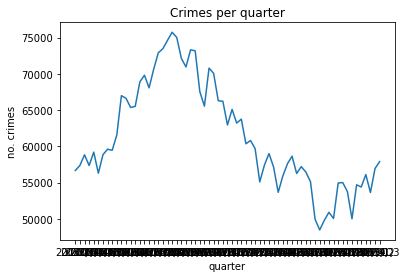

In [16]:
quarterly_crimes = df_irl[df_irl.columns[5:]].sum()
line_plot(quarterly_crimes.index, quarterly_crimes.tolist(), title = 'Crimes per quarter', xlabel = 'quarter', ylabel = 'no. crimes')

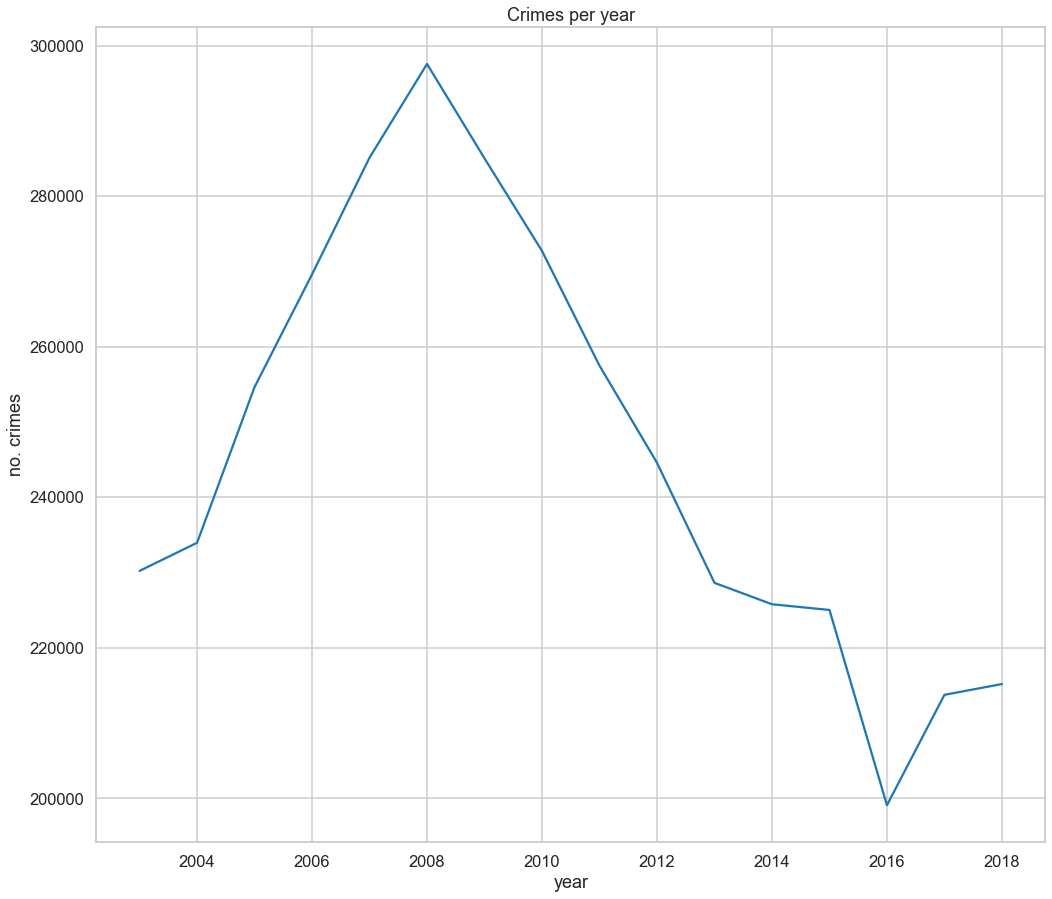

In [450]:
no_crimes_yearly = [sum(quarterly_crimes[i:i+4]) for i in range(0, len(quarterly_crimes), 4)] 
years = range(2003, 2020)

line_plot(years[0:len(years)-1], no_crimes_yearly[0:len(no_crimes_yearly)-1], title = 'Crimes per year', xlabel = 'year', ylabel = 'no. crimes')

In [454]:
#county region has most crimes
regional_crimes = df_irl.groupby(['REGION']).sum()
regional_crimes.drop('OFFENCE CODE', axis=1, inplace=True)
regional_crimes.sum(axis=1)

REGION
DUBLIN METROPOLITAN REGION    1687832
EASTERN REGION                 553256
NORTHERN REGION                382487
SOUTH EASTERN REGION           431838
SOUTHERN REGION                690862
WESTERN REGION                 360367
dtype: int64

In [456]:
divisional_crimes = df_irl.groupby(['GARDA DIVISION']).sum()
divisional_crimes.drop('OFFENCE CODE', axis=1, inplace=True)
divisional_crimes.sum(axis=1) / len(divisional_crimes.columns)

GARDA DIVISION
CAVAN/MONAGHAN          1384.761194
CLARE                   1085.701493
CORK CITY               3627.402985
CORK NORTH              1218.134328
CORK WEST                857.000000
D.M.R. EASTERN          2336.671642
D.M.R. NORTH CENTRAL    5066.432836
D.M.R. NORTHERN         4386.522388
D.M.R. SOUTH CENTRAL    4782.402985
D.M.R. SOUTHERN         3728.791045
D.M.R. WESTERN          4890.701493
DONEGAL                 1585.194030
GALWAY                  2446.328358
KERRY                   1420.835821
KILDARE                 2183.835821
KILKENNY/CARLOW         1660.402985
LAOIS/OFFALY            1609.910448
LIMERICK                3188.000000
LOUTH                   1795.134328
MAYO                    1014.880597
MEATH                   1545.671642
ROSCOMMON/LONGFORD       831.701493
SLIGO/LEITRIM            943.671642
TIPPERARY               1508.283582
WATERFORD               1839.223881
WESTMEATH               1173.850746
WEXFORD                 1437.432836
WICKLOW      

In [457]:
divisional_crime_ranking = divisional_crimes.sum(axis=1) / divisional_crimes.sum(axis=1).sum()
divisional_crime_ranking.sort_values(ascending=False)

GARDA DIVISION
D.M.R. NORTH CENTRAL    0.082659
D.M.R. WESTERN          0.079792
D.M.R. SOUTH CENTRAL    0.078025
D.M.R. NORTHERN         0.071566
D.M.R. SOUTHERN         0.060835
CORK CITY               0.059181
LIMERICK                0.052012
GALWAY                  0.039912
D.M.R. EASTERN          0.038123
KILDARE                 0.035629
WATERFORD               0.030007
LOUTH                   0.029288
WICKLOW                 0.028458
KILKENNY/CARLOW         0.027090
LAOIS/OFFALY            0.026266
DONEGAL                 0.025862
MEATH                   0.025218
TIPPERARY               0.024608
WEXFORD                 0.023452
KERRY                   0.023181
CAVAN/MONAGHAN          0.022592
CORK NORTH              0.019874
WESTMEATH               0.019151
CLARE                   0.017713
MAYO                    0.016558
SLIGO/LEITRIM           0.015396
CORK WEST               0.013982
ROSCOMMON/LONGFORD      0.013569
dtype: float64

<AxesSubplot:xlabel='GARDA DIVISION'>

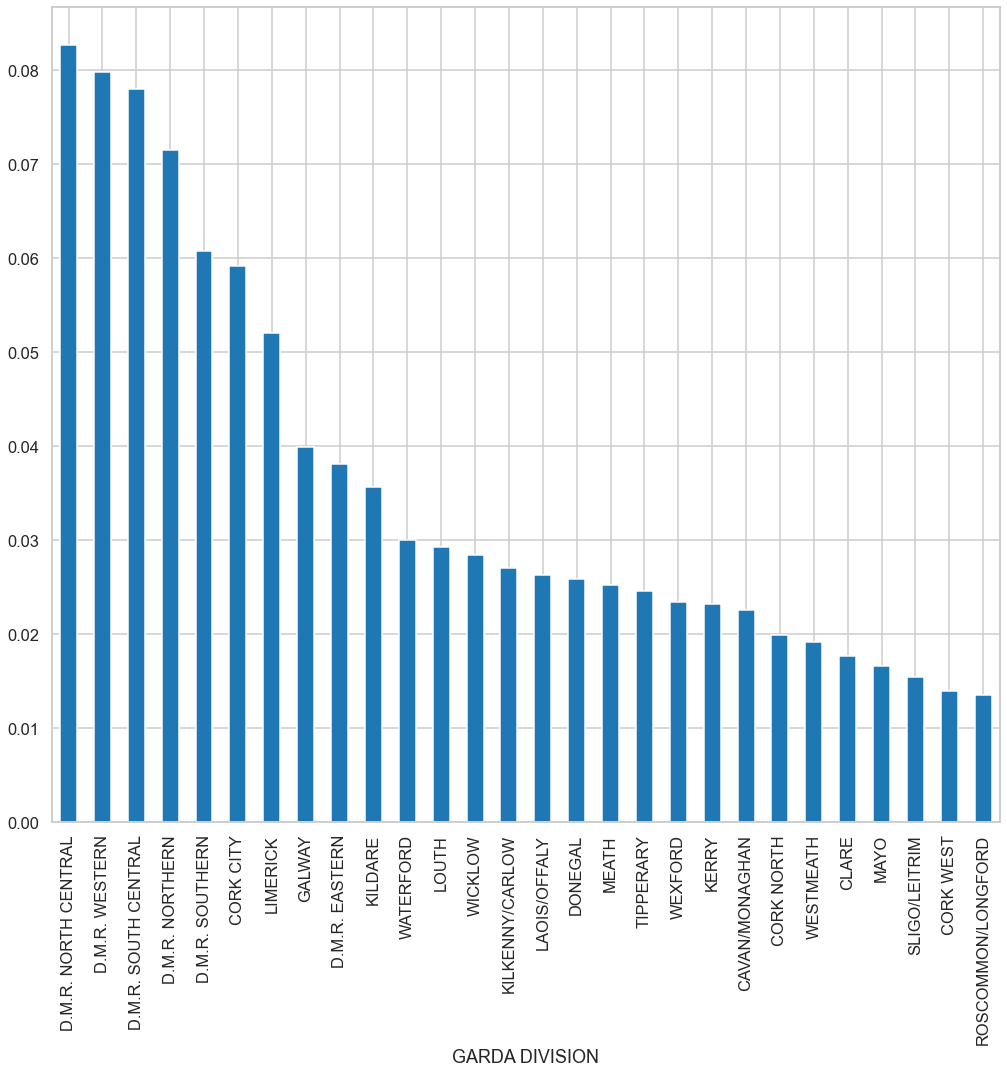

In [458]:
divisional_crime_ranking.sort_values(ascending=False).plot.bar()

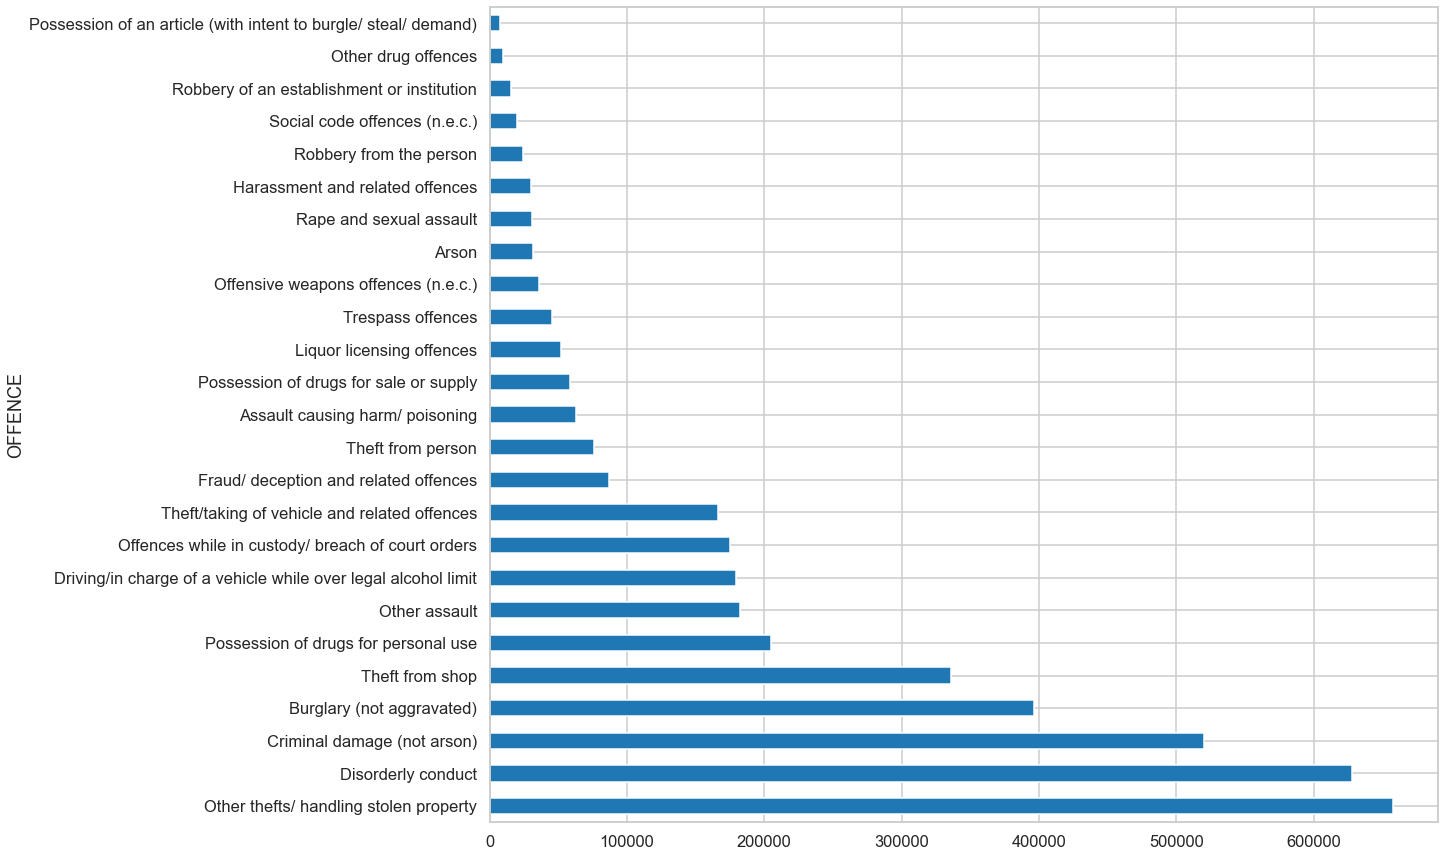

In [470]:
national_offence_counts = df_irl.groupby('OFFENCE').sum().drop('OFFENCE CODE', axis=1).sum(axis=1)
national_offence_counts.sort_values(ascending=False)[:25].plot.barh()
plt.show()

In [36]:
df_i1=pd.read_csv('ip.csv')
df_i1

,Date,Population,Annual % Change,Unnamed: 3,Unnamed: 4
0,31-12-1950,2906599,NaN,NaN,NaN
1,31-12-1951,2924705,0.62,NaN,NaN
2,31-12-1952,2929379,0.16,NaN,NaN
3,31-12-1953,2917037,-0.42,NaN,NaN
4,31-12-1954,2902780,-0.49,NaN,NaN
...,...,...,...,...,...
146,31-12-2096,5746414,-0.08,NaN,NaN
147,31-12-2097,5740980,-0.09,NaN,NaN
148,31-12-2098,5735154,-0.10,NaN,NaN
149,31-12-2099,5728935,-0.11,NaN,NaN


In [37]:
df_i2=pd.read_csv('iu.csv')
df_i2

,Date,Unemployment Rate (%),Annual Change,Unnamed: 3,Unnamed: 4
0,31-12-1991,15.780,NaN,NaN,NaN
1,31-12-1992,15.030,-0.75,NaN,NaN
2,31-12-1993,15.590,0.56,NaN,NaN
3,31-12-1994,14.570,-1.02,NaN,NaN
4,31-12-1995,11.980,-2.59,NaN,NaN
5,31-12-1996,11.720,-0.26,NaN,NaN
6,31-12-1997,10.200,-1.52,NaN,NaN
7,31-12-1998,7.700,-2.50,NaN,NaN
8,31-12-1999,5.800,-1.90,NaN,NaN
9,31-12-2000,4.320,-1.48,NaN,NaN


In [38]:
df_i3=pd.read_csv('ic.csv')
df_i3

,Date,Per 100K Population,Annual % Change,Unnamed: 3,Unnamed: 4
0,31-12-1990,0.4842,NaN,NaN,NaN
1,31-12-1991,0.6538,35.03,NaN,NaN
2,31-12-1992,0.7082,8.32,NaN,NaN
3,31-12-1993,0.6484,-8.44,NaN,NaN
4,31-12-1994,0.7007,8.07,NaN,NaN
5,31-12-1995,1.1970,70.83,NaN,NaN
6,31-12-1996,1.1603,-3.07,NaN,NaN
7,31-12-1997,1.0408,-10.30,NaN,NaN
8,31-12-1998,1.0304,-1.00,NaN,NaN
9,31-12-1999,1.0184,-1.16,NaN,NaN


In [51]:
df_p=df_i1.dropna(axis=1)
df_p

,Date,Population
0,31-12-1950,2906599
1,31-12-1951,2924705
2,31-12-1952,2929379
3,31-12-1953,2917037
4,31-12-1954,2902780
...,...,...
146,31-12-2096,5746414
147,31-12-2097,5740980
148,31-12-2098,5735154
149,31-12-2099,5728935


In [52]:
df_u=df_i2.dropna(axis=1)
df_u

,Date,Unemployment Rate (%)
0,31-12-1991,15.780
1,31-12-1992,15.030
2,31-12-1993,15.590
3,31-12-1994,14.570
4,31-12-1995,11.980
5,31-12-1996,11.720
6,31-12-1997,10.200
7,31-12-1998,7.700
8,31-12-1999,5.800
9,31-12-2000,4.320


In [53]:
df_c=df_i3.dropna(axis=1)
df_c

,Date,Per 100K Population
0,31-12-1990,0.4842
1,31-12-1991,0.6538
2,31-12-1992,0.7082
3,31-12-1993,0.6484
4,31-12-1994,0.7007
5,31-12-1995,1.1970
6,31-12-1996,1.1603
7,31-12-1997,1.0408
8,31-12-1998,1.0304
9,31-12-1999,1.0184


In [213]:
df_irl=pd.merge(df_p, df_c)
df_irl

,Date,Population,Per 100K Population
0,31-12-1990,3485374,0.4842
1,31-12-1991,3504805,0.6538
2,31-12-1992,3528367,0.7082
3,31-12-1993,3545700,0.6484
4,31-12-1994,3559398,0.7007
5,31-12-1995,3579482,1.1970
6,31-12-1996,3606728,1.1603
7,31-12-1997,3640150,1.0408
8,31-12-1998,3678667,1.0304
9,31-12-1999,3719912,1.0184


In [57]:
df_irl1=pd.merge(df_u, df_c)
df_irl1

,Date,Unemployment Rate (%),Per 100K Population
0,31-12-1991,15.78,0.6538
1,31-12-1992,15.03,0.7082
2,31-12-1993,15.59,0.6484
3,31-12-1994,14.57,0.7007
4,31-12-1995,11.98,1.1970
5,31-12-1996,11.72,1.1603
6,31-12-1997,10.20,1.0408
7,31-12-1998,7.70,1.0304
8,31-12-1999,5.80,1.0184
9,31-12-2000,4.32,0.9780


In [214]:
#creating csv
df_irl.to_csv('pc.csv')

In [220]:
df_irlcp = pd.read_csv('pc.csv', index_col = 'Date', parse_dates = True)
df_irlcp

df_irlcp.columns = ['Date', 'Population', 'Per 100K Population']

<AxesSubplot:xlabel='Date'>

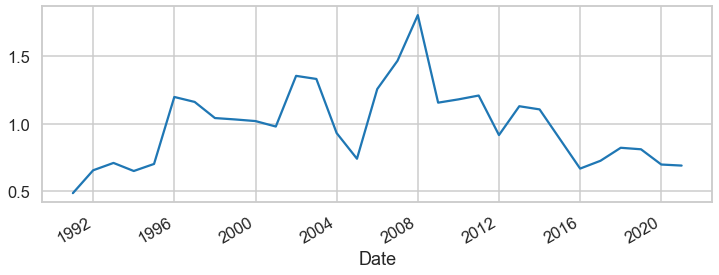

In [222]:
#exponential smoothing
df_irlcp['Per 100K Population'].plot(figsize = (12,4))

In [223]:
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

In [225]:
HORIZON = 10
model = ExponentialSmoothing(endog = df_irlcp['Per 100K Population'])
results=model.fit()
preds = results.get_forecast(steps= HORIZON)
preds.summary_frame(alpha= 0.2).head(3)

C:\Users\chinmay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  inferred_freq = True
C:\Users\chinmay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  # Handle slices (if the given index keys cover more than one date)


Per 100K Population,mean,mean_se,mean_ci_lower,mean_ci_upper
30,0.705162,0.243669,0.392888,1.017436
31,0.705162,0.289876,0.333671,1.076653
32,0.705162,0.329669,0.282674,1.127650


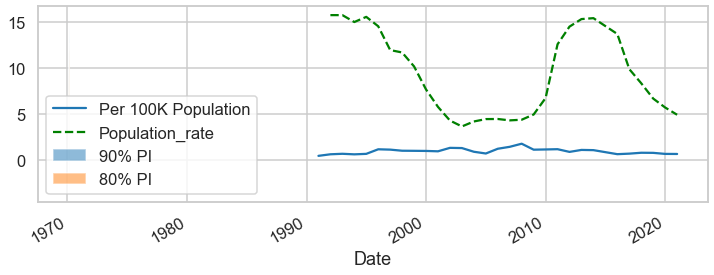

In [471]:
ax = df_irlcp['Per 100K Population'].plot(figsize = (12,4))
forecast_80 = preds.summary_frame(alpha = 0.2)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
forecast_90 = preds.summary_frame(alpha = 0.1)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
ax.fill_between(forecast_90.index,forecast_90['mean_ci_lower'], forecast_90['mean_ci_upper'], alpha =0.5, label = '90% PI');
ax.fill_between(forecast_80.index,forecast_80['mean_ci_lower'], forecast_80['mean_ci_upper'], alpha =0.5, label = '80% PI');

results.fittedvalues.plot(ax=ax, label = 'Population_rate', color = 'green', linestyle='--')
ax.legend(loc=3);

In [233]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Exponential Smoothing Results                         
===============================================================================
Dep. Variable:     Per 100K Population   No. Observations:                   30
Model:                    ETS(A, N, N)   Log Likelihood                  -0.210
Date:                 Sun, 04 Dec 2022   AIC                              6.420
Time:                         15:40:16   BIC                             10.623
Sample:                              0   HQIC                             7.764
                                  - 30   Scale                            0.059
Covariance Type:                   opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.6444      0.133      4.845      0.000       0.384       0.905
initial_level       0.5522      0.686      0.805      0.421      -0.793       1.897
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                 0.09
Prob(Q):                              0.46   Prob(JB):                         0.95
Heteroskedasticity (H):               0.97   Skew:                             0.11
Prob(H) (two-sided):                  0.96   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [120]:
#implementing ARIMA 

In [158]:
!pip install pmdarima

  Using cached pmdarima-2.0.2-cp39-cp39-win_amd64.whl (572 kB)
  Using cached statsmodels-0.13.5-cp39-cp39-win_amd64.whl (9.2 MB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\chinmay\\anaconda3\\Lib\\site-packages\\~tatsmodels\\nonparametric\\linbin.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



<AxesSubplot:>

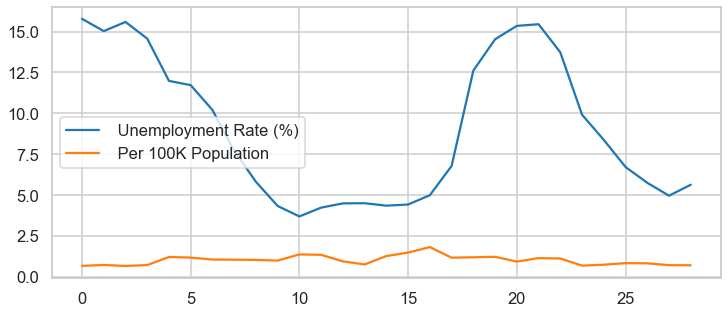

In [123]:
df_irl1.plot(figsize=(12,5))

<AxesSubplot:>

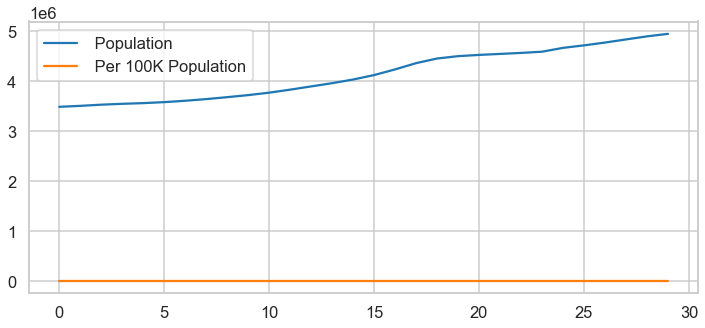

In [124]:
df_irl.plot(figsize=(12,5))

In [127]:
df_irl.head()

,Date,Population,Per 100K Population
0,31-12-1990,3485374,0.4842
1,31-12-1991,3504805,0.6538
2,31-12-1992,3528367,0.7082
3,31-12-1993,3545700,0.6484
4,31-12-1994,3559398,0.7007


In [126]:
df_irl1.head()

,Date,Unemployment Rate (%),Per 100K Population
0,31-12-1991,15.78,0.6538
1,31-12-1992,15.03,0.7082
2,31-12-1993,15.59,0.6484
3,31-12-1994,14.57,0.7007
4,31-12-1995,11.98,1.1970


In [132]:
#Defining column names explicitly
df_irl.columns = ['Date', 'Population', 'Per 100K Population']

In [133]:
df_irl

,Date,Population,Per 100K Population
0,31-12-1990,3485374,0.4842
1,31-12-1991,3504805,0.6538
2,31-12-1992,3528367,0.7082
3,31-12-1993,3545700,0.6484
4,31-12-1994,3559398,0.7007
5,31-12-1995,3579482,1.1970
6,31-12-1996,3606728,1.1603
7,31-12-1997,3640150,1.0408
8,31-12-1998,3678667,1.0304
9,31-12-1999,3719912,1.0184


<AxesSubplot:>

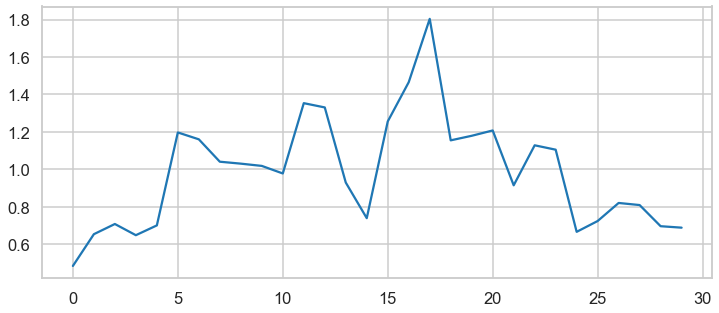

In [134]:
df_irl['Per 100K Population'].plot(figsize=(12,5))

<AxesSubplot:>

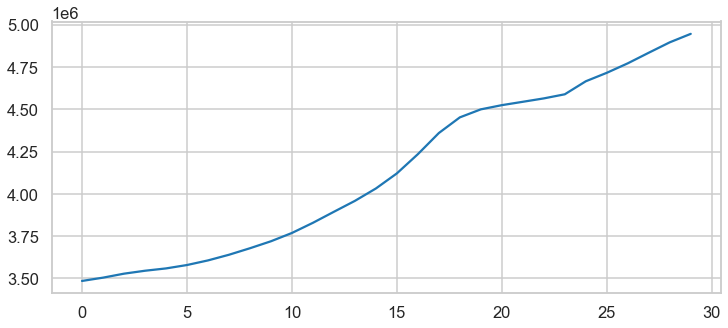

In [135]:
df_irl['Population'].plot(figsize=(12,5))

In [136]:
df_irl1.columns = ['Date', 'Unemployment Rate (%)', 'Per 100K Population']

In [137]:
df_irl1

,Date,Unemployment Rate (%),Per 100K Population
0,31-12-1991,15.78,0.6538
1,31-12-1992,15.03,0.7082
2,31-12-1993,15.59,0.6484
3,31-12-1994,14.57,0.7007
4,31-12-1995,11.98,1.1970
5,31-12-1996,11.72,1.1603
6,31-12-1997,10.20,1.0408
7,31-12-1998,7.70,1.0304
8,31-12-1999,5.80,1.0184
9,31-12-2000,4.32,0.9780


<AxesSubplot:>

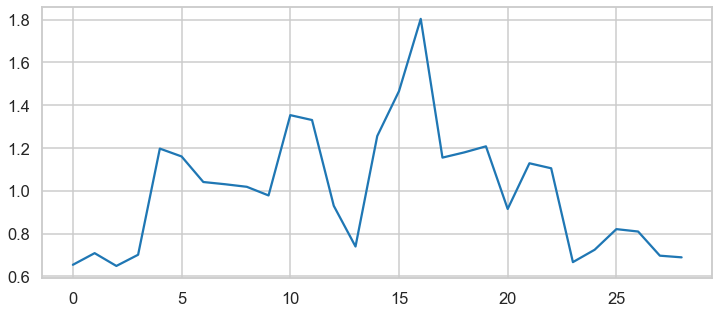

In [138]:
df_irl1['Per 100K Population'].plot(figsize=(12,5))

<AxesSubplot:>

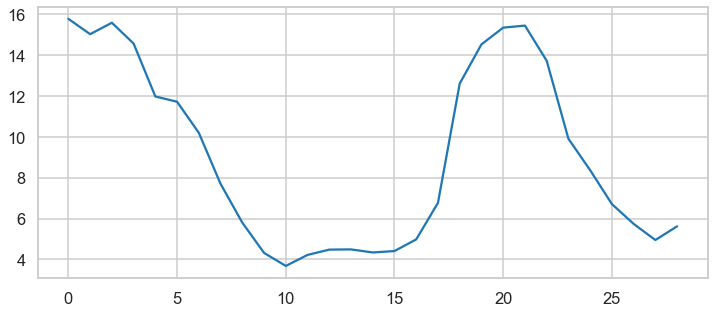

In [139]:
df_irl1['Unemployment Rate (%)'].plot(figsize=(12,5))

In [143]:
#statistical tests
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df_irl['Per 100K Population'])

1. ADF :  -2.7736046007087807
2. P-Value :  0.06214420211641812
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 29
5. Critical Values :
	 1% :  -3.6790595944893187
	 5% :  -2.9678817237279103
	 10% :  -2.6231583472057074


In [144]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df_irl1['Per 100K Population'])

1. ADF :  -2.6392684869667473
2. P-Value :  0.08514977869613233
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 28
5. Critical Values :
	 1% :  -3.6889256286443146
	 5% :  -2.9719894897959187
	 10% :  -2.6252957653061224


In [149]:
#Transformation of the dataset to make it stationary 
df_irl_log=np.sqrt(df_irl['Per 100K Population'])
df_irl_diff=df_irl_log.diff().dropna()

In [151]:
result=adfuller (df_irl_diff)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -5.338074
p-value: 0.000005
Critical values:
	1%: -3.700
	5%: -2.976
	10%: -2.628


In [152]:
#Transformation of the dataset to make it stationary 
df_irl1_log=np.sqrt(df_irl1['Per 100K Population'])
df_irl1_diff=df_irl1_log.diff().dropna()

In [153]:
result=adfuller (df_irl1_diff)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -5.167647
p-value: 0.000010
Critical values:
	1%: -3.711
	5%: -2.981
	10%: -2.630


In [155]:
df_irl1_diff

1     0.032967
2    -0.036313
3     0.031845
4     0.256997
5    -0.016903
6    -0.056976
7    -0.005110
8    -0.005928
9    -0.020219
10    0.174418
11   -0.009841
12   -0.189359
13   -0.104332
14    0.260755
15    0.089998
16    0.132403
17   -0.268319
18    0.011247
19    0.012999
20   -0.142457
21    0.105810
22   -0.011072
23   -0.234918
24    0.034669
25    0.054874
26   -0.006204
27   -0.065105
28   -0.004687
Name: Per 100K Population, dtype: float64

In [172]:
df_irl_diff.columns = ['Date', 'Per 100K Population']
df_irl_diff

1     0.112734
2     0.032967
3    -0.036313
4     0.031845
5     0.256997
6    -0.016903
7    -0.056976
8    -0.005110
9    -0.005928
10   -0.020219
11    0.174418
12   -0.009841
13   -0.189359
14   -0.104332
15    0.260755
16    0.089998
17    0.132403
18   -0.268319
19    0.011247
20    0.012999
21   -0.142457
22    0.105810
23   -0.011072
24   -0.234918
25    0.034669
26    0.054874
27   -0.006204
28   -0.065105
29   -0.004687
Name: Per 100K Population, dtype: float64

In [190]:
df_p.columns = ['Date', 'Population']

In [191]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_p['Population'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=3324.317, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3074.909, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=3102.949, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=3153.712, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=3215.869, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3076.818, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.472 seconds


In [192]:
print(df_p.shape)
train=df_p.iloc[:-30]
test=df_p.iloc[-30:]
print(train.shape,test.shape)

(151, 2)
(121, 2) (30, 2)


In [197]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Population'],order=(0,2,0))
model=model.fit()
model.summary()

C:\Users\chinmay\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)



<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D2.Population   No. Observations:                  119
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -1240.405
Method:                           css   S.D. of innovations           8140.678
Date:                Sun, 04 Dec 2022   AIC                           2484.809
Time:                        14:43:27   BIC                           2490.367
Sample:                             2   HQIC                          2487.066
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -176.0420    746.255     -0.236      0.814   -1638.674    1286.590
==============================================================================
"""

In [239]:
!conda install -c conda-forge fbprophet -y


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://conda.anaconda.org/conda-forge/win-64'




In [242]:
!pip install --upgrade plotly

In [413]:
#Neural Network

In [397]:
ip = np.asarray(df_irlcp['Population'].values)
ip = np.asarray([[i] for i in ip])
ip

array([[3485374],
       [3504805],
       [3528367],
       [3545700],
       [3559398],
       [3579482],
       [3606728],
       [3640150],
       [3678667],
       [3719912],
       [3768950],
       [3829018],
       [3894258],
       [3958705],
       [4031954],
       [4121216],
       [4234806],
       [4359834],
       [4452392],
       [4499792],
       [4524585],
       [4544501],
       [4564550],
       [4588832],
       [4665760],
       [4715788],
       [4771854],
       [4834507],
       [4896019],
       [4946119]], dtype=int64)

In [422]:
predictors = df_irlcp.iloc[:,0:1]
response = df_irlcp.iloc[:,1]

In [399]:
X_train, X_test, Y_train, Y_test = train_test_split(predictors, response, test_size=0.2)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(24, 1) (24,)
(6, 1) (6,)


In [406]:
kerasmodel = Sequential()
kerasmodel.add(Dense(8, input_dim=1, activation = 'relu'))
kerasmodel.add(Dense(2, activation = 'relu'))
kerasmodel.add(Dense(1, activation = 'sigmoid'))
kerasmodel.add(Flatten())

In [407]:
kerasmodel.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [474]:
kerasmodel.fit(X_train, Y_train, epochs=10, batch_size = 10)

Epoch 1/10
3/3 [==============================] - 1s 10ms/step - loss: 18783074.0000 - accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 0s 6ms/step - loss: 17404472.0000 - accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 0s 6ms/step - loss: 15412985.0000 - accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 0s 7ms/step - loss: 13976477.0000 - accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 0s 5ms/step - loss: 12761416.0000 - accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 0s 6ms/step - loss: 11516699.0000 - accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 0s 4ms/step - loss: 10121329.0000 - accuracy: 0.0000e+00
Epoch 8/10
3/3 [==============================] - 0s 5ms/step - loss: 8947745.0000 - accuracy: 0.0000e+00
Epoch 9/10
3/3 [==============================] - 0s 5ms/step - loss: 7643330.0000 - accuracy: 0.0000e+00
Epoch 10/10
3/3 [=====================

In [409]:
_, accuracy = kerasmodel.evaluate(X_train, Y_train)
print('train accuracy:%.2f'% (accuracy*100))

1/1 [==============================] - 0s 300ms/step - loss: -124713.1172 - accuracy: 0.0000e+00
train accuracy:0.00


In [ ]:
#Linear Regression

In [414]:
LiRe= LinearRegression()
LiRe.fit(X_train, Y_train)

LinearRegression()

In [416]:
Y_predict=LiRe.predict(X_test)
print(Y_predict)
print(Y_test)

[3285233.5883322  3342751.29794554 4435587.7805989  4608140.9094389
 3917928.39407888 4320552.36137223]
Date
1990-12-31    3485374
1991-12-31    3504805
2010-12-31    4524585
2013-12-31    4588832
2001-12-31    3829018
2008-12-31    4452392
Name: Population, dtype: int64


In [417]:
print('coeficient of determination: %.3f' % r2_score(Y_test, Y_predict))

coeficient of determination: 0.926


In [443]:
#MSE
from sklearn import metrics
metrics.mean_squared_error(Y_test, Y_predict)

16649612377.620684

In [446]:
#RMSE
mean_sq_err = metrics.mean_squared_error(Y_test, Y_predict)
np.sqrt(mean_sq_err)

129033.37699068672

In [ ]:
#Creating csv for crime rates with respect to unemployment

In [423]:
df_irl1.to_csv('pc1.csv')

In [426]:
df_irlcp1 = pd.read_csv('pc1.csv', index_col = 'Date', parse_dates = True)
df_irlcp1

df_irlcp1.columns = ['Date', 'Unemployment Rate (%)', 'Per 100K Population']

In [ ]:
#Neural Network

In [427]:
ip = np.asarray(df_irlcp1['Unemployment Rate (%)'].values)
ip = np.asarray([[i] for i in ip])
ip

array([[15.78],
       [15.03],
       [15.59],
       [14.57],
       [11.98],
       [11.72],
       [10.2 ],
       [ 7.7 ],
       [ 5.8 ],
       [ 4.32],
       [ 3.68],
       [ 4.22],
       [ 4.48],
       [ 4.49],
       [ 4.34],
       [ 4.41],
       [ 4.98],
       [ 6.77],
       [12.61],
       [14.53],
       [15.35],
       [15.45],
       [13.73],
       [ 9.91],
       [ 8.37],
       [ 6.71],
       [ 5.74],
       [ 4.95],
       [ 5.62]])

In [428]:
predictors = df_irlcp1.iloc[:,0:1]
response = df_irlcp1.iloc[:,1]

In [429]:
x_train, x_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(23, 1) (23,)
(6, 1) (6,)


In [430]:
kerasmodel = Sequential()
kerasmodel.add(Dense(8, input_dim=1, activation = 'relu'))
kerasmodel.add(Dense(2, activation = 'relu'))
kerasmodel.add(Dense(1, activation = 'sigmoid'))
kerasmodel.add(Flatten())

In [431]:
kerasmodel.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [432]:
kerasmodel.fit(x_train, y_train, epochs=10, batch_size = 10)

Epoch 1/10
3/3 [==============================] - 1s 3ms/step - loss: 65.3843 - accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 62.2077 - accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 58.6623 - accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 0s 3ms/step - loss: 55.1693 - accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 0s 4ms/step - loss: 52.0287 - accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 0s 2ms/step - loss: 48.7200 - accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 0s 3ms/step - loss: 45.4249 - accuracy: 0.0000e+00
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 42.2492 - accuracy: 0.0000e+00
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 38.8872 - accuracy: 0.0000e+00
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 35.9571 - accuracy: 

In [433]:
_, accuracy = kerasmodel.evaluate(x_train, y_train)
print('train accuracy:%.2f'% (accuracy*100))

1/1 [==============================] - 0s 136ms/step - loss: 33.6006 - accuracy: 0.0000e+00
train accuracy:0.00


<AxesSubplot:xlabel='Date'>

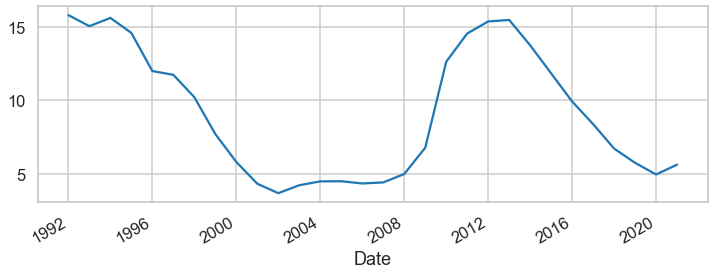

In [435]:
#Exponential smoothing
df_irlcp1['Unemployment Rate (%)'].plot(figsize = (12,4))

In [436]:
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

In [437]:
HORIZON = 10
model = ExponentialSmoothing(endog = df_irlcp1['Unemployment Rate (%)'])
results=model.fit()
preds = results.get_forecast(steps= HORIZON)
preds.summary_frame(alpha= 0.2).head(3)

C:\Users\chinmay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  inferred_freq = True
C:\Users\chinmay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  # Handle slices (if the given index keys cover more than one date)


Unemployment Rate (%),mean,mean_se,mean_ci_lower,mean_ci_upper
29,5.619925,1.767104,3.355290,7.884560
30,5.619925,2.498923,2.417426,8.822425
31,5.619925,3.060487,1.697754,9.542097


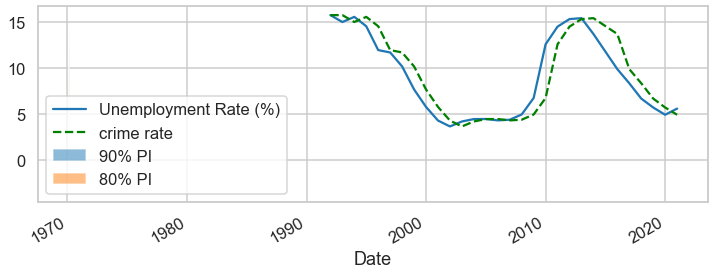

In [472]:
ax = df_irlcp1['Unemployment Rate (%)'].plot(figsize = (12,4))
forecast_80 = preds.summary_frame(alpha = 0.2)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
forecast_90 = preds.summary_frame(alpha = 0.1)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
ax.fill_between(forecast_90.index,forecast_90['mean_ci_lower'], forecast_90['mean_ci_upper'], alpha =0.5, label = '90% PI');
ax.fill_between(forecast_80.index,forecast_80['mean_ci_lower'], forecast_80['mean_ci_upper'], alpha =0.5, label = '80% PI');

results.fittedvalues.plot(ax=ax, label = 'crime rate', color = 'green', linestyle='--')
ax.legend(loc=3);

In [439]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Exponential Smoothing Results                          
=================================================================================
Dep. Variable:     Unemployment Rate (%)   No. Observations:                   29
Model:                      ETS(A, N, N)   Log Likelihood                 -57.660
Date:                   Mon, 05 Dec 2022   AIC                            121.320
Time:                           18:07:07   BIC                            125.422
Sample:                                0   HQIC                           122.605
                                    - 29   Scale                            3.123
Covariance Type:                     opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.173      5.788      0.000       0.661       1.338
initial_level      15.7794   4670.540      0.003      0.997   -9138.311    9169.870
===================================================================================
Ljung-Box (L1) (Q):                  11.46   Jarque-Bera (JB):                23.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                             1.24
Prob(H) (two-sided):                  0.72   Kurtosis:                         6.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [440]:
#Linear regression
LiRe= LinearRegression()
LiRe.fit(x_train, y_train)

LinearRegression()

In [441]:
y_predict=LiRe.predict(x_test)
print(y_predict)
print(y_test)

[ 7.8407585   8.97822537 10.62123306  8.85184016  9.35738099  9.10461057]
Date
2018-12-31     5.74
2008-12-31     6.77
1995-12-31    11.98
2009-12-31    12.61
2005-12-31     4.34
2007-12-31     4.98
Name: Unemployment Rate (%), dtype: float64


In [442]:
print('coeficient of determination: %.3f' % r2_score(y_test, y_predict))

coeficient of determination: -0.025


In [444]:
#MSE
from sklearn import metrics
metrics.mean_squared_error(y_test, y_predict)

11.240997148888022

In [449]:
#RMSE
mean_sq_err = metrics.mean_squared_error(y_test, y_predict)
np.sqrt(mean_sq_err)

3.3527596318388264

In [461]:
#ARIMA model on garda stations dataset

from pmdarima import auto_arima
stepwise_fit = auto_arima(df_irl['OFFENCE CODE'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=23143.759, Time=4.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=23810.341, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=23375.382, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=23202.758, Time=1.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=25195.162, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=23142.797, Time=3.50 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=23180.246, Time=1.60 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=23188.518, Time=1.84 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=23183.235, Time=1.93 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=23128.394, Time=1.66 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=23074.165, Time=3.56 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=22900.910, Time=4.67 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=22909.577, Time=5.35 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=22893.046, Time=5.84 sec
 ARIMA(0,0,5)(0,0,0

In [462]:
print(df_irl.shape)
train=df_irl.iloc[:-30]
test=df_irl.iloc[-30:]
print(train.shape,test.shape)

(1624, 72)
(1594, 72) (30, 72)


In [463]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['OFFENCE CODE'],order=(1,0,5))
model=model.fit()
model.summary()

C:\Users\chinmay\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           OFFENCE CODE   No. Observations:                 1594
Model:                     ARMA(1, 5)   Log Likelihood              -11214.940
Method:                       css-mle   S.D. of innovations            274.836
Date:                Tue, 06 Dec 2022   AIC                          22445.880
Time:                        12:10:24   BIC                          22488.872
Sample:                             0   HQIC                         22461.848
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                426.4744     27.921     15.274      0.000     371.750     481.199
ar.L1.OFFENCE CODE     0.8775      0.017     50.911      0.000       0.844       0.911
ma.L1.OFFENCE CODE    -0.2551      0.031     -8.196      0.000      -0.316      -0.194
ma.L2.OFFENCE CODE    -0.6244      0.026    -23.986      0.000      -0.675      -0.573
ma.L3.OFFENCE CODE    -0.1923      0.037     -5.198      0.000      -0.265      -0.120
ma.L4.OFFENCE CODE     0.4774      0.029     16.187      0.000       0.420       0.535
ma.L5.OFFENCE CODE     0.0935      0.030      3.123      0.002       0.035       0.152
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1396           +0.0000j            1.1396            0.0000
MA.1            1.0410           -0.4329j            1.1274           -0.0627
MA.2            1.0410           +0.4329j            1.1274            0.0627
MA.3           -0.9499           -0.8300j            1.2614           -0.3857
MA.4           -0.9499           +0.8300j            1.2614            0.3857
MA.5           -5.2899           -0.0000j            5.2899           -0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

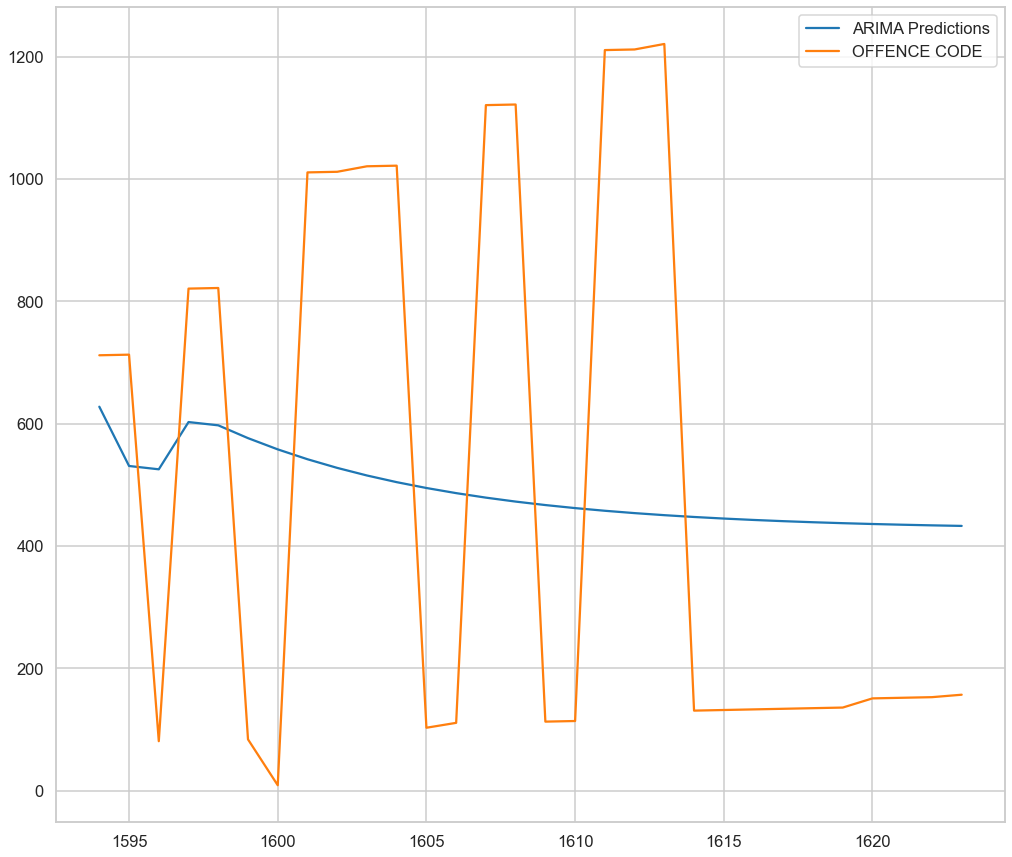

In [464]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['OFFENCE CODE'].plot(legend=True)

In [467]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['OFFENCE CODE'].mean()
rmse=sqrt(mean_squared_error(pred,test['OFFENCE CODE']))
print(rmse)

441.8128802221767


In [468]:
test['OFFENCE CODE'].mean()

501.6666666666667